<a href="https://colab.research.google.com/github/SahilGolait/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Sahil Rahul Golait


# **Project Summary -**

The project focuses on a UK-based non-store online retail business that specializes in unique all-occasion gifts. The goal is to uncover the major customer segments of the business using a transaction data set that contains information on customer transactions, such as invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. By analyzing this data, we aim to identify different customer segments based on their purchasing behavior and characteristics, such as demographics, purchasing frequency, and average spend. The insights gained from this analysis can help the business optimize its marketing and sales strategies to better serve its customers, ultimately improving customer satisfaction and increasing revenue.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to analyze the transaction data of a UK-based non-store online retail business that specializes in unique all-occasion gifts and identify the major customer segments based on their purchasing behavior and characteristics. The data set includes information on invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. The goal is to gain insights into the different customer segments, their behavior, and their needs, in order to optimize the business's marketing and sales strategies. This analysis can help the business better understand its customers and tailor its offerings to their preferences and needs.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
#Read the dataset file
retail_df = pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")

### Dataset First View

In [4]:
# Dataset First Look
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
retail_df.shape

(541909, 8)

### Dataset Information

In [6]:
# Dataset Info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset has 541909 rows and 8 columns, but we have missing information in two of the columns. The CustomerID column has 406829 values, meaning that some information is missing. The same is true for the Description column. It's important to keep in mind these missing values when analyzing our dataset.

## ***2. Understanding Your Variables***

In [7]:
# Dataset Columns
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
# Dataset Describe
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

Answer Here : When looking at the summary statistics generated by the describe function, it is apparent that some negative values exist in the data. These negative values might indicate that products were returned or cancelled. Another noteworthy observation is that the 99th percentile for both the UnitPrice and Quantity columns is low, while the maximum value is much higher. This suggests that there are outliers in the data, which could be due to the occasional purchase of valuable items. Additionally, the UnitPrice and Quantity columns are inversely related to each other.



*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*   StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

*   Description: Product (item) name.
*   Quantity: The quantities of each product (item) per transaction. Numeric.

*   InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
*   UnitPrice: Unit price. Numeric, Product price per unit.



*   CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   Country: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable.
retail_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## **The number of unique items in the dataset.**

In [10]:
# Get the unique values of the StockCode column and shape
unique_stock_codes = retail_df.StockCode.unique().shape

# Print the result
print("Shape of unique values of StockCode column:", unique_stock_codes[0])

Shape of unique values of StockCode column: 4070


In [11]:
# Get the unique values in the Description column and shape
unique_descriptions = retail_df.Description.unique().shape

# Print the result
print("Number of unique descriptions:", unique_descriptions[0])

Number of unique descriptions: 4224


The descriptions of the items in the dataset show that there are more descriptions than stock codes, meaning that some stock codes have multiple descriptions associated with them.

## **Stockcode which have more than one description**

In [12]:
# Group the retail data by the StockCode and Description columns
cat_des_df = retail_df.groupby(["StockCode", "Description"]).count().reset_index()

In [13]:
# Get the StockCode value counts where the count is greater than 1
# Reset the index and get the first 10 rows
head_stock_codes = (cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1]
                    .reset_index())

# Show the result
head_stock_codes.head(10)

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5
5,72807A,5
6,23343,5
7,23131,5
8,21181,5
9,21829,4


In [14]:
# Get the 7th most common StockCode
selected_stock_code = cat_des_df.StockCode.value_counts().reset_index()['index'][6]

# Get the unique descriptions for the selected stock code
unique_descriptions = retail_df[retail_df['StockCode'] == selected_stock_code]['Description'].unique()

# Print the result
print("Unique descriptions for stock code", selected_stock_code, ":", unique_descriptions)
     

Unique descriptions for stock code 23343 : ['JUMBO BAG VINTAGE CHRISTMAS ' 'came coded as 20713'
 'wrongly coded 20713' '20713 wrongly marked' 20713]


## **Examining invoices that have been Cancelled.**

We will look for invoices with the letter "C" in the InvoiceNo column to see if there is an invoice with the quantity of -80995. If so, this would confirm that negative quantities correspond to cancelled orders.

In [15]:
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [16]:
# Find a transaction where the quantity is -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


As expected, negative values in the Quantity column indicate that the order was cancelled.

### Let's see how many cancelled orders there are in the data set.

In [17]:
# Get the number of unique invoice numbers in the retail_df DataFrame
total_orders_count = retail_df['InvoiceNo'].nunique()

# Get the number of rows in the cancelled_orders DataFrame
cancelled_orders_count = len(cancelled_orders)

# Calculate the percentage of cancelled orders as a fraction of the total number of orders
cancelled_orders_percentage = cancelled_orders_count / total_orders_count * 100

# Print the results
print(f"Number of cancelled orders: {cancelled_orders_count}")
print(f"Percentage of cancelled orders: {cancelled_orders_percentage:.2f}%")

Number of cancelled orders: 9288
Percentage of cancelled orders: 35.86%


A large number of orders, 35.86%, were cancelled. Analyzing these cancelled orders could help prevent cancellations in the future.

## **Determine the top 10 countries with the most cancelled orders.**

In [18]:
# Determine the number of cancelled orders for each country
cancel_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()

# Sort the country-wise count of cancelled orders in descending order and get the top 10 countries
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


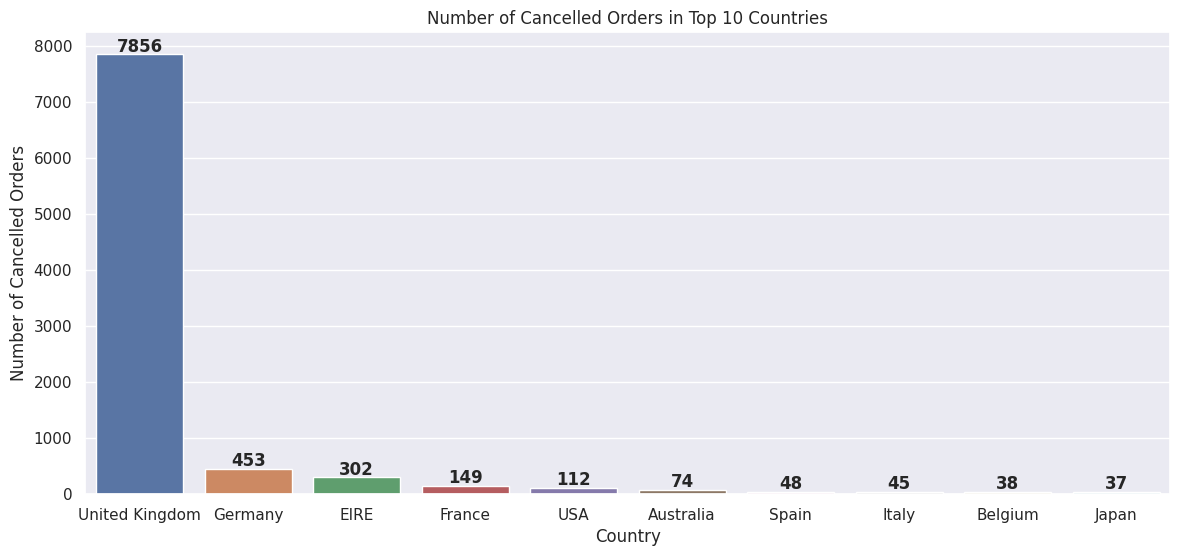

In [19]:
# Set the size of the figure to be displayed
plt.figure(figsize=(14,6))

# Plot the bar chart using Seaborn
sns.barplot(x='Country', y='InvoiceNo', data=cancel_order_country_top10)

# Add annotations on the bar charts
for i, v in enumerate(cancel_order_country_top10['InvoiceNo']):
    plt.text(i, v+50, str(v), ha='center', fontweight='bold')

# Add labels and title to the chart
plt.xlabel('Country') # Label for the x-axis
plt.ylabel('Number of Cancelled Orders') # Label for the y-axis
plt.title('Number of Cancelled Orders in Top 10 Countries') # Title for the chart

# Show the plot
plt.show()

1) A bar chart was chosen to display the number of cancelled orders in the top 10 countries because it is an effective way to compare and visualize data.

2) The chart provides insight into the countries with the highest number of cancelled orders, which can help businesses identify potential issues with customer satisfaction or logistical issues.

3) The insights gained from the chart can help businesses improve their customer satisfaction and logistics processes, potentially leading to fewer cancelled orders and increased revenue.

## **Average Number of Orders per Customer**

In [20]:
# Group the retail data by customer ID and count the number of unique invoices for each customer ID
groupby_customers = pd.DataFrame(retail_df.groupby("CustomerID")["InvoiceNo"].nunique())

# Display the first 5 rows of the resulting dataframe
print(groupby_customers.head())

            InvoiceNo
CustomerID           
12346.0             2
12347.0             7
12348.0             4
12349.0             1
12350.0             1


In [21]:
# Display summary statistics for the groupby_customers dataframe
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


On average, each customer places 5 orders.

#### Missing Values/Null Values

In [22]:
# Missing Values/Null Values Count
retail_df.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

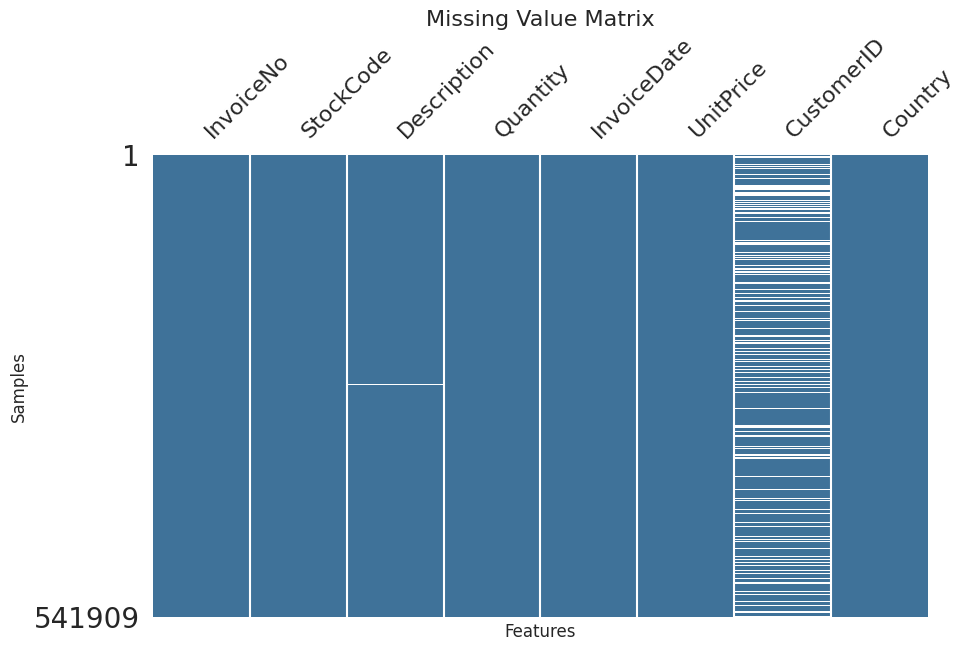

In [23]:
# Visualizing the missing values
import missingno as msno

# create missing value matrix plot
msno.matrix(retail_df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()

In [24]:
# Make a copy of the original retail data dataframe
retail_df_copy = retail_df.copy()

## **Removing the Cancelled order.**

In [25]:
# Filter the copied dataframe to only include rows where the 'Quantity' column is greater than 0
retail_df_copy = retail_df_copy[retail_df_copy['Quantity'] > 0]

# Check the shape of the filtered dataframe
print("Number of rows:", retail_df_copy.shape[0], "Number of columns:", retail_df_copy.shape[1])

Number of rows: 531285 Number of columns: 8


## **Removing NA values.**

In [26]:
# Remove all rows with missing values in the 'CustomerID' column
retail_df_copy.dropna(subset=['CustomerID'], how='all', inplace=True)

# Check the shape of the updated dataframe
print(retail_df_copy.shape)

(397924, 8)


In [27]:
# Check for missing values in the copied dataframe after removing NA values in 'CustomerID' column
retail_df_copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Duplicate Values

In [28]:
# Dataset Duplicate Value Count

retail_df.duplicated().sum()

5268

In [29]:
# remove duplicates in place in the retail_df_copy dataframe
retail_df_copy.drop_duplicates(inplace=True)

In [30]:
# Checking shape after cleaning
retail_df_copy.shape

(392732, 8)

The missing value imputation technique used was dropping rows with missing values in the 'CustomerID' column. This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.

### What did you know about your dataset?

Answer Here : The dataset includes information about transactions from a UK-based, non-store online retail business that specializes in unique all-occasion gifts. The data covers a period of one year, from 01/12/2010 to 09/12/2011, and contains information about each transaction, including the invoice number, product code, product name, quantity, invoice date and time, unit price, customer ID, and country. The dataset could be used to perform various types of analyses, including customer segmentation, sales forecasting, and inventory management.

## 3. ***Data Wrangling***

### Data Wrangling Code

Creating 'total_cost' column in retail data by multiplying 'Quantity' and 'UnitPrice' columns.

In [31]:
# Write your code to make your dataset analysis ready.
# create a new column 'total_cost' in the dataframe 'retail_df_copy'
retail_df_copy['total_cost'] = retail_df_copy['Quantity'] * retail_df_copy['UnitPrice']
     

In [32]:
# display the first 5 rows of the dataframe 'retail_df_copy'
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Let us see what is the total revenue generated from customers in each country.

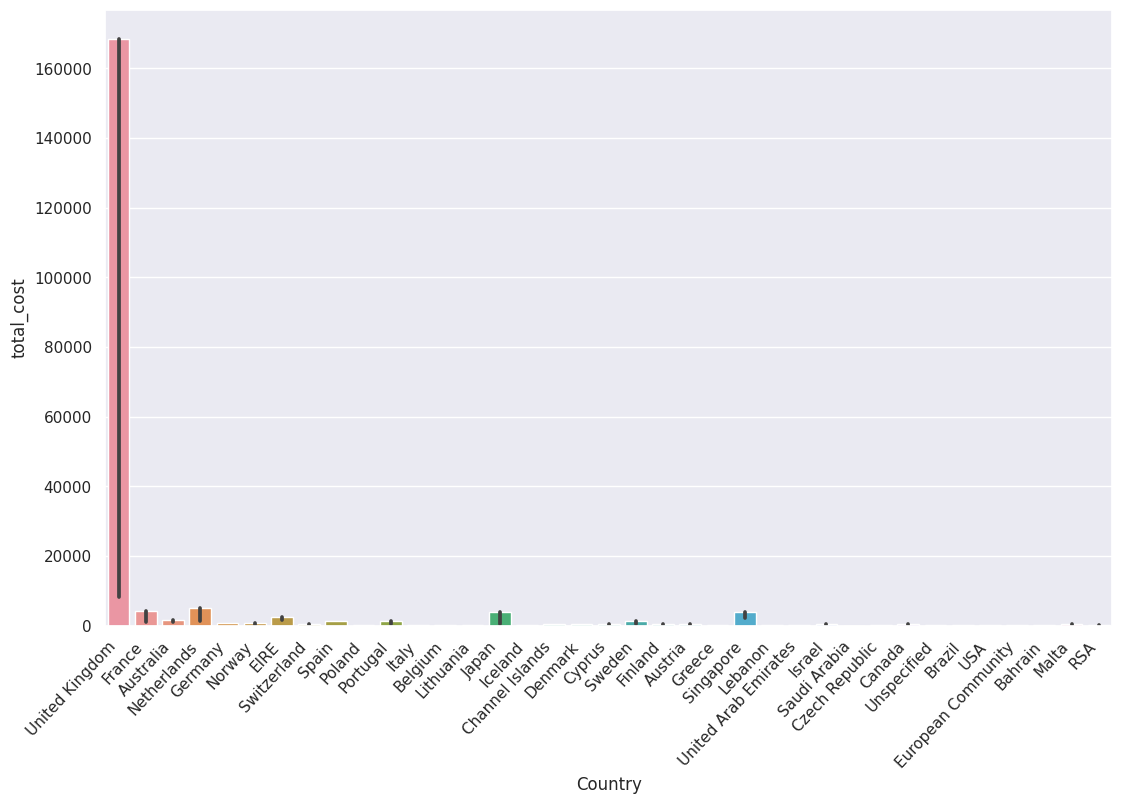

In [33]:
# Chart - 1 visualization code

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(13, 8)

# Create a bar plot using seaborn
ax = sns.barplot(x='Country', y='total_cost', data=retail_df_copy, estimator=max, ax=ax)

# Rotate the x-axis labels by 47 degrees and align them to the right
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: A bar graph is an effective way to compare the total cost of sales for different countries. It allows for easy visual comparison of the magnitude of sales in each country.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : We can conclude that not only does the UK generate the highest sales revenues, but it also has the most customers. By exploring this further, we can gain insight into what products customers purchase together, as well as potential future opportunities in the UK market.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : Yes, the insights gained from this graph can help the business make informed decisions about where to focus their resources and potentially increase sales and profitability.

#### Chart - 2 : Proportion of orders from each Country

In [34]:
# Extract the unique values of the 'Country' column in the retail_df_copy DataFrame
unique_countries = retail_df_copy['Country'].unique()

# Print the unique values of the 'Country' column
print(unique_countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [35]:
# Count the number of occurrences of each unique value in the 'Country' column of the retail_df_copy DataFrame
country_counts = retail_df_copy['Country'].value_counts()

# Print the resulting Series
print(country_counts)
     

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [36]:
# Create a new DataFrame with the top countries
top_countries = pd.DataFrame(retail_df_copy['Country'].value_counts().sort_values(ascending = False).reset_index())

# Calculate the percentage of orders for each country
top_countries['Country %'] = top_countries['Country'] * 100 / retail_df_copy['Country'].count()

# Rename the columns in the DataFrame
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'}, inplace = True)

# Display the top 5 rows of the DataFrame
top_countries.head()
     

,Country,Total Counts,Country %
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474


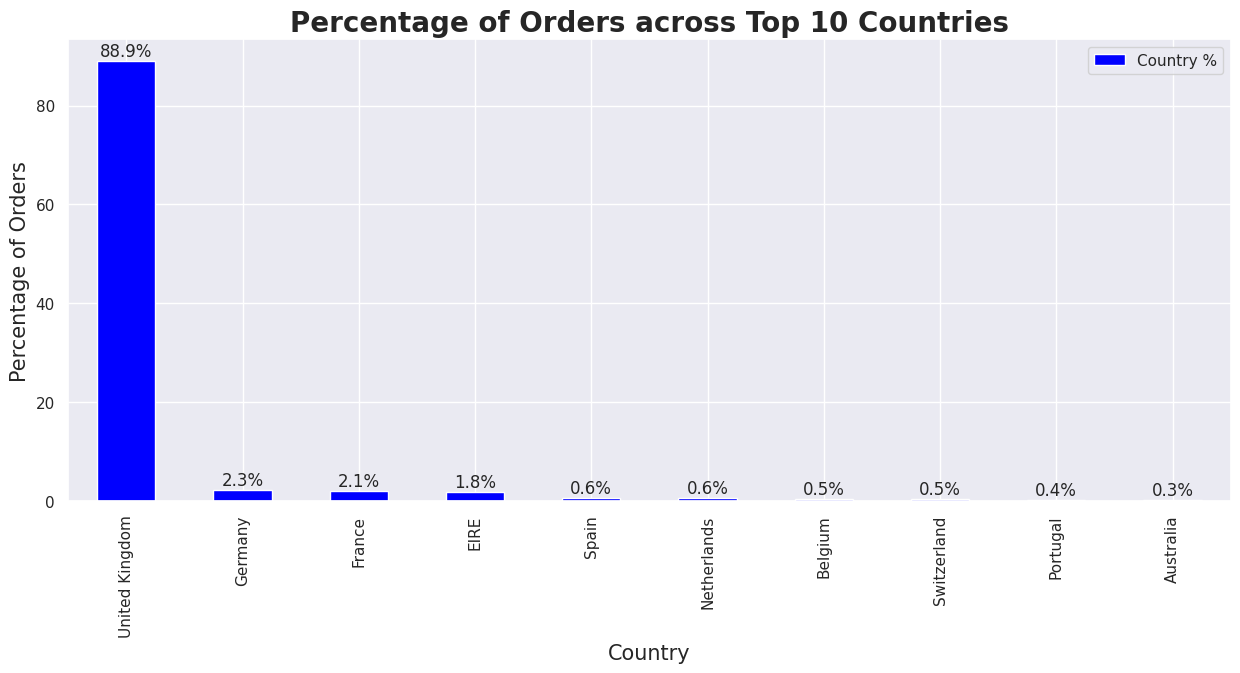

In [37]:
# Chart - 2 visualization code
# Limit the DataFrame to only show the top 10 countries
top_countries = top_countries.head(10)

# Plot the top 10 countries as a bar chart
top_countries.plot(x='Country', y='Country %', kind='bar', figsize=(15, 6), color='blue')

# Add the title, x-axis label, and y-axis label
plt.title('Percentage of Orders across Top 10 Countries', size=20, fontweight='bold')
plt.xlabel('Country', size=15)
plt.ylabel('Percentage of Orders', size=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add the percentage value on top of each bar
for i in range(top_countries.shape[0]):
    plt.text(x=i, y=top_countries['Country %'][i]+1, s=f"{top_countries['Country %'][i]:.1f}%", ha='center')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: A bar chart was chosen to show the percentage of orders across the top 10 countries because it allows for easy comparison of the values between different countries.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The majority of customers, at 88.92%, are from the United Kingdom. Other significant customer groups include Germany (2.30%), France (2.12%), Eire (1.84%), and Spain (0.63%). The remaining customers come from countries such as the Netherlands, Belgium, Switzerland, Portugal, and Australia.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : Yes, the insights gained from this chart can help the business make informed decisions about where to focus their marketing efforts, potentially increasing their sales and revenue.

#### Chart - 3 : Top Customers

In [38]:
# Creating a dataframe of top customers by number of transactions
top_customers = pd.DataFrame(retail_df_copy['CustomerID'].value_counts().sort_values(ascending = False).reset_index())

# Renaming columns in the dataframe
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)

# Displaying the top 5 customers
top_customers.head()

,CustomerID,count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


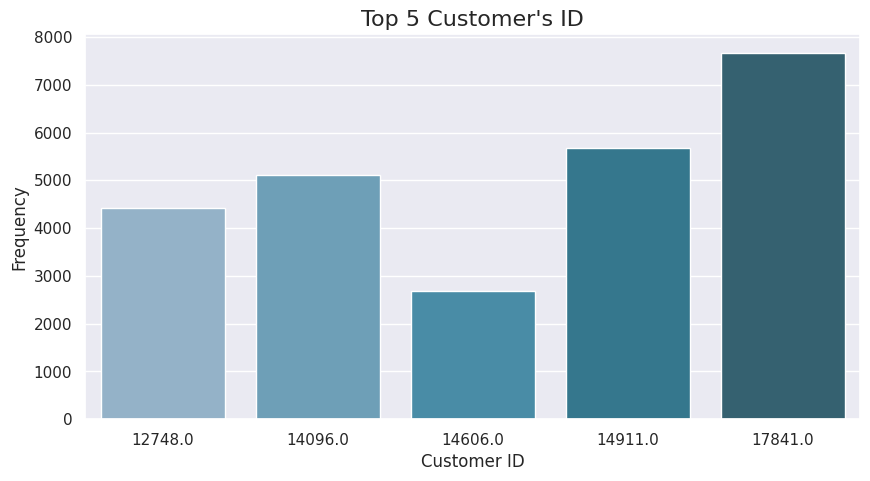

In [39]:
# Chart - 3 visualization code
# Increase the figure size
plt.figure(figsize = (10,5))

# Use a different color palette
sns.set_palette('PuBuGn_d')

# Create the bar plot
sns.barplot(x = 'CustomerID',y = 'count',data = top_customers[:5])

# Add labels and a title
plt.xlabel('Customer ID', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title("Top 5 Customer's ID", fontsize = 16)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 customer IDs.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The chart provides insight into the customers who make the most purchases from the business and helps identify potential loyal customers or areas for improvement in customer retention.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 4 : The spread of customers throughout a twelve-month period.

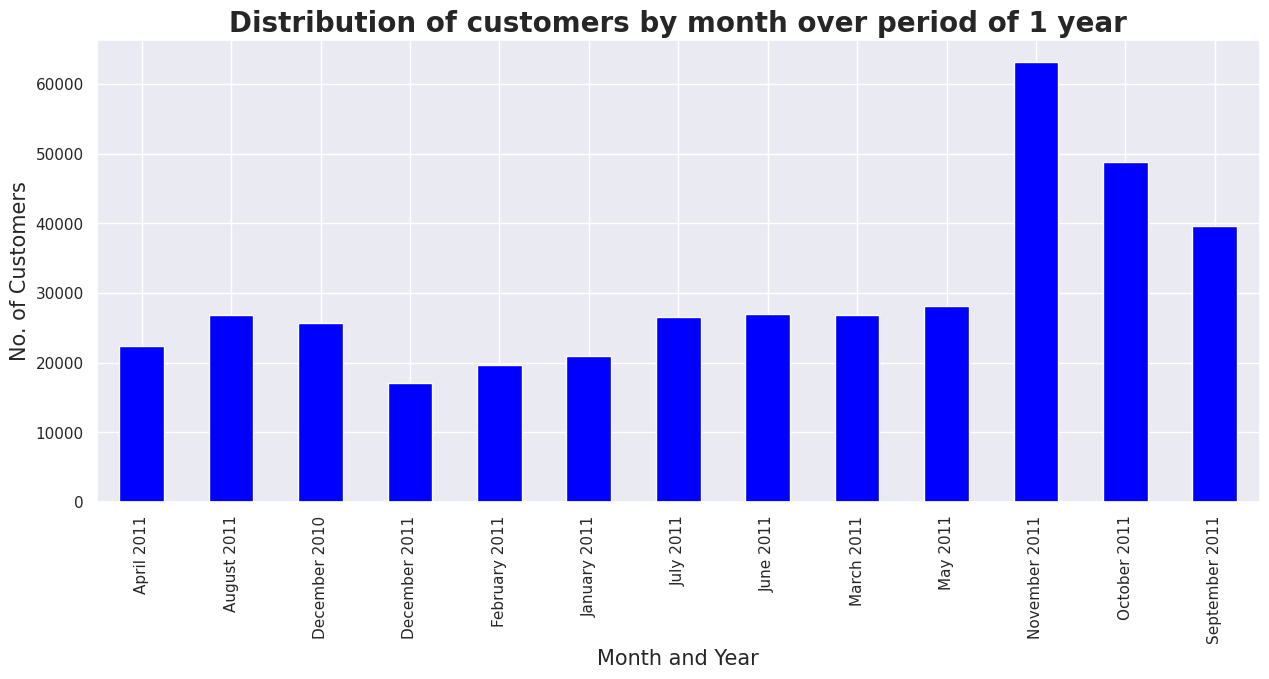

In [40]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))

# Group the retail_df_copy dataframe by the month and year of the InvoiceDate column
# Count the number of unique CustomerID values in each group
monthly_customer_distribution = retail_df_copy.groupby(retail_df_copy['InvoiceDate'].dt.strftime('%B %Y'))['CustomerID'].count()

# Plot the customer distribution as a bar chart
monthly_customer_distribution.plot(kind='bar', color='blue')

# Set the title and labels for the x and y axes
plt.title('Distribution of customers by month over period of 1 year', size=20, fontweight='bold')
plt.xlabel('Month and Year', size=15)
plt.ylabel('No. of Customers', size=15)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: A bar graph was chosen to represent this data because it is a good way to visually display the distribution of customers over time. Each bar represents a month and year, and the height of the bar indicates the number of customers in that month and year.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : This chart can provide insights into how the number of customers changes over time. For example, we can see which months have more customers and which have fewer. This can help identify patterns and trends, and can be useful in planning marketing campaigns or adjusting inventory levels to meet customer demand.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : Yes, the insights gained from this chart can help create a positive business impact by informing decisions around marketing campaigns and inventory management. By understanding how the number of customers varies over time, businesses can make more informed decisions and allocate resources more effectively.

#### Chart - 5 : Top Selling products

In [41]:
# Group the data by product name and calculate the sum of the quantity sold for each product
product_group = retail_df_copy.groupby('Description').sum()['Quantity']

# Sort the data in descending order
product_group = product_group.sort_values(ascending=False)

# Select the top 10 items
top_10_selling_products = product_group.index[:10]

# Create a new dataframe to store the top 10 selling products
top_10_products_df = pd.DataFrame({'Product': top_10_selling_products, 'Quantity Sold': product_group.values[:10]})

# Print the result
top_10_products_df

,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3,JUMBO BAG RED RETROSPOT,46078
4,WHITE HANGING HEART T-LIGHT HOLDER,36706
5,ASSORTED COLOUR BIRD ORNAMENT,35263
6,PACK OF 72 RETROSPOT CAKE CASES,33670
7,POPCORN HOLDER,30919
8,RABBIT NIGHT LIGHT,27153
9,MINI PAINT SET VINTAGE,26076


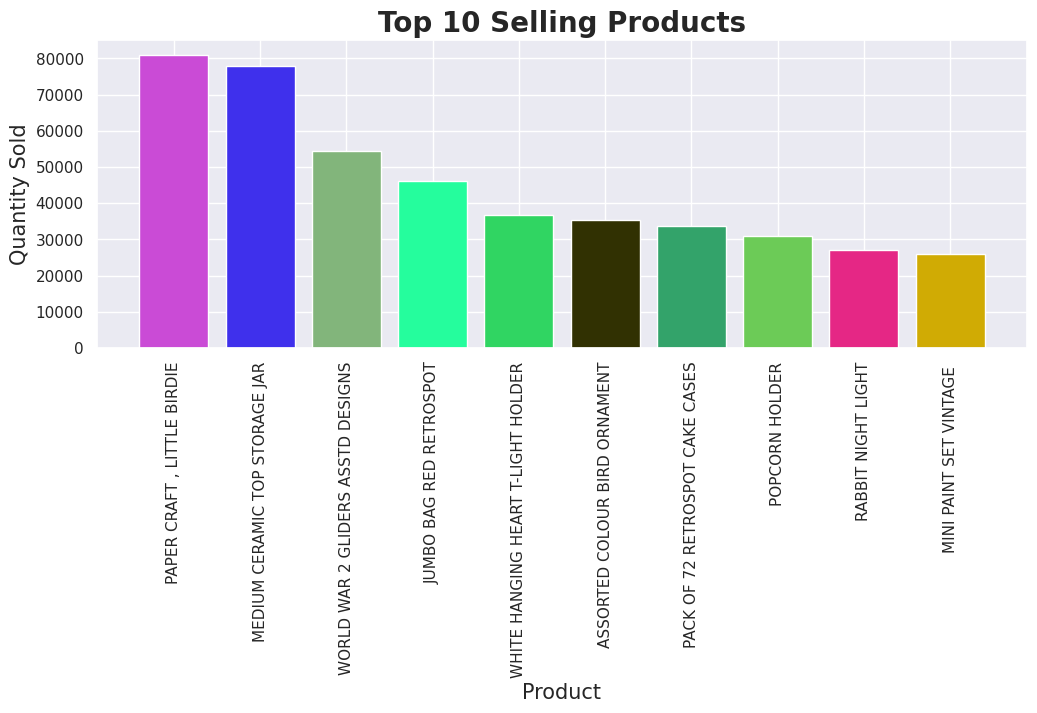

In [42]:
# Chart - 5 visualization code
import random

# Generate a list of random colors
colors = [tuple(random.random() for i in range(3)) for j in range(len(top_10_products_df))]

# Plot the bar chart
plt.figure(figsize=(12, 4))
plt.bar(top_10_products_df['Product'], top_10_products_df['Quantity Sold'], color=colors)

# Set the title and axis labels
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
plt.xlabel('Product', size=15)
plt.ylabel('Quantity Sold', size=15)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

#### Chart - 6 : Least Selling Products

In [43]:
# Get the top 10 least selling products
least_selling_products = retail_df_copy.groupby('Description').sum().sort_values('Quantity', ascending=True).head(10)

least_selling_products

,Quantity,UnitPrice,CustomerID,total_cost
Description,,,,
BLOSSOM IMAGES SCRAP BOOK SET,1,4.95,14723.0,4.95
PACK 4 FLOWER/BUTTERFLY PATCHES,1,1.25,12748.0,1.25
BLACK DROP EARRINGS W LONG BEADS,1,2.95,14570.0,2.95
VINTAGE BEAD PINK JEWEL STAND,1,4.95,16904.0,4.95
SET/3 FLORAL GARDEN TOOLS IN BAG,1,7.95,14083.0,7.95
WHITE ROSEBUD PEARL EARRINGS,1,2.55,15856.0,2.55
WHITE STONE/CRYSTAL EARRINGS,1,2.95,17364.0,2.95
SET/3 TALL GLASS CANDLE HOLDER PINK,1,12.75,17999.0,12.75
CROCHET DOG KEYRING,1,1.65,14461.0,1.65


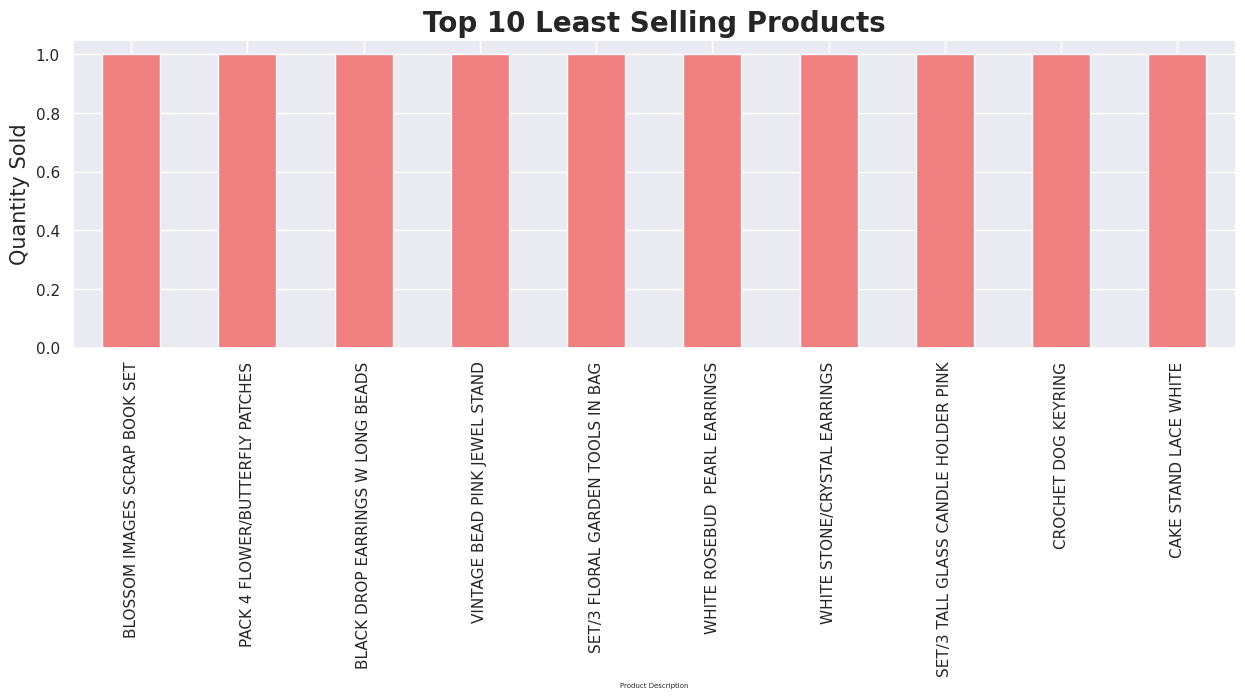

In [44]:
# Chart - 6 visualization code

# Plot the top 10 least selling products as a bar chart
least_selling_products['Quantity'].plot(kind='bar', figsize=(15, 4), color='lightcoral')

# Set the title, x-label, and y-label for the chart
plt.title('Top 10 Least Selling Products', size=20, fontweight='bold')
plt.xlabel('Product Description', size=5)
plt.ylabel('Quantity Sold', size=15)
plt.xticks(rotation=90)

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.: A bar chart is a suitable choice for representing the top 10 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

#### Chart - 7 : Quantity Distribution

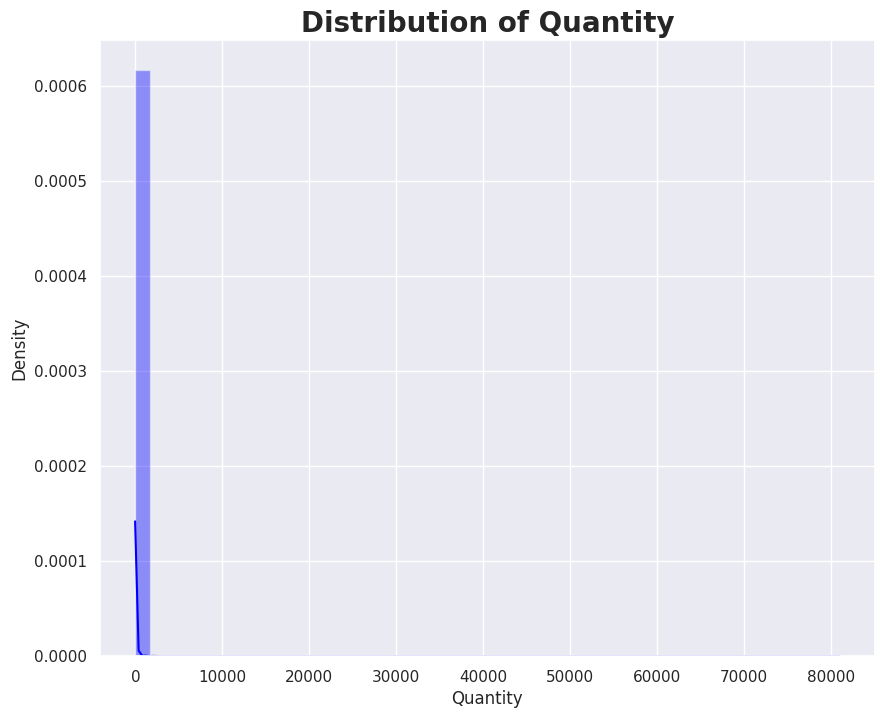

In [45]:
# Chart - 7 visualization code
#Distribution of Quantity
plt.figure(figsize=(10,8))

# Set the plot title
plt.title('Distribution of Quantity', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(retail_df_copy['Quantity'], color='blue')

# Display the plot
plt.show()

We can observe that the distribution of quantity is highly positively skewed. To remove this skewness, we can apply the log transformation to the data.

<Axes: title={'center': 'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

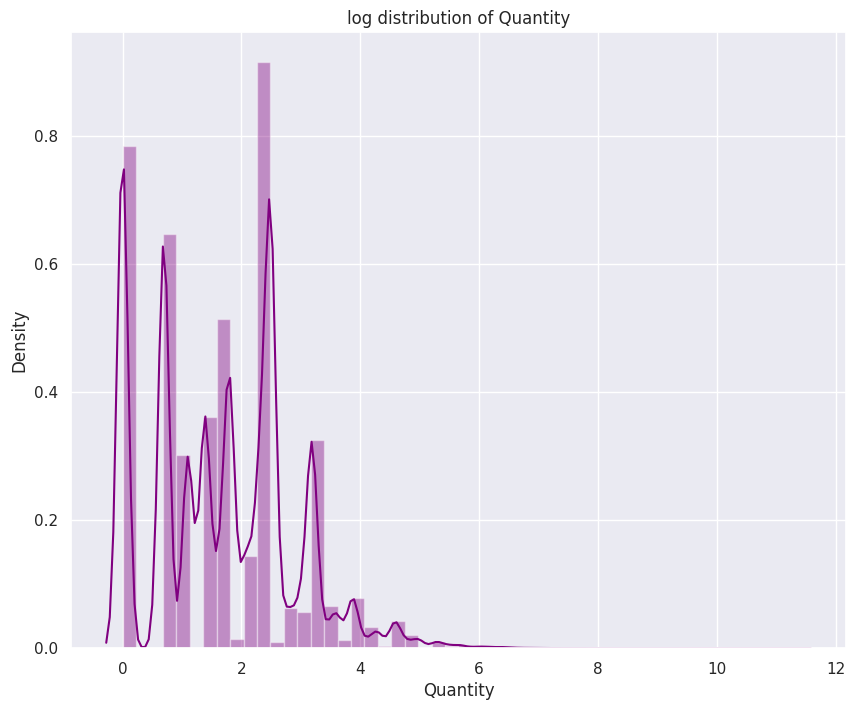

In [46]:

# plotting log distribution of Quantity
plt.figure(figsize=(10,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(retail_df_copy['Quantity']),color="purple")

##### 1. Why did you pick the specific chart?

Answer Here.: The log distribution of Quantity is plotted to better visualize the distribution of data that is heavily skewed to the right.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The log distribution of Quantity chart helps to identify the range of values that most of the observations are within. It shows that the majority of Quantity values are between 0 and 5, with a long tail of values reaching up to 7.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : The insights gained from this chart could help the business make decisions on inventory management and supply chain logistics. For example, the business may want to focus on stocking more products that have a higher average quantity sold, or re-evaluate their pricing strategy for products with lower quantities sold.

# **Feature Engineering**

## Convert the column InvoiceDate to datetime format.

In [47]:
#Convert the InvoiceDate column to a datetime data type
retail_df_copy["InvoiceDate"] = pd.to_datetime(retail_df_copy["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

## Create new features, Day and Month, from the InvoiceDate.

In [48]:
# Create a new column named 'Day' in the retail_df_copy dataframe
retail_df_copy['Day'] = retail_df_copy['InvoiceDate'].dt.day_name()

# Create a new column named 'Month' in the retail_df_copy dataframe
retail_df_copy['Month'] = retail_df_copy['InvoiceDate'].dt.month_name()

## Create new features from the Invoice Date such as Hours, Year, Month Number, and Day Number.

In [49]:
# Create a new feature 'year' that contains the year of the InvoiceDate
retail_df_copy["year"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.year)

# Create a new feature 'month_num' that contains the number of the month of the InvoiceDate
retail_df_copy["month_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.month)

# Create a new feature 'day_num' that contains the number of the day of the month of the InvoiceDate
retail_df_copy["day_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.day)

# Create a new feature 'hour' that contains the hour of the day of the InvoiceDate
retail_df_copy["hour"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.hour)

# Create a new feature 'minute' that contains the minute of the hour of the InvoiceDate
retail_df_copy["minute"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.minute)

In [50]:
# Check the head of the dataset after extracting new features from existing features
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,Day,Month,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26


In [51]:
# Check the shape of the retail_df_copy dataframe after creating new features
shape = retail_df_copy.shape
print("The shape of the retail_df_copy dataframe is:", shape)

The shape of the retail_df_copy dataframe is: (392732, 16)


#### Chart - 8 : Distribution of Unit Price

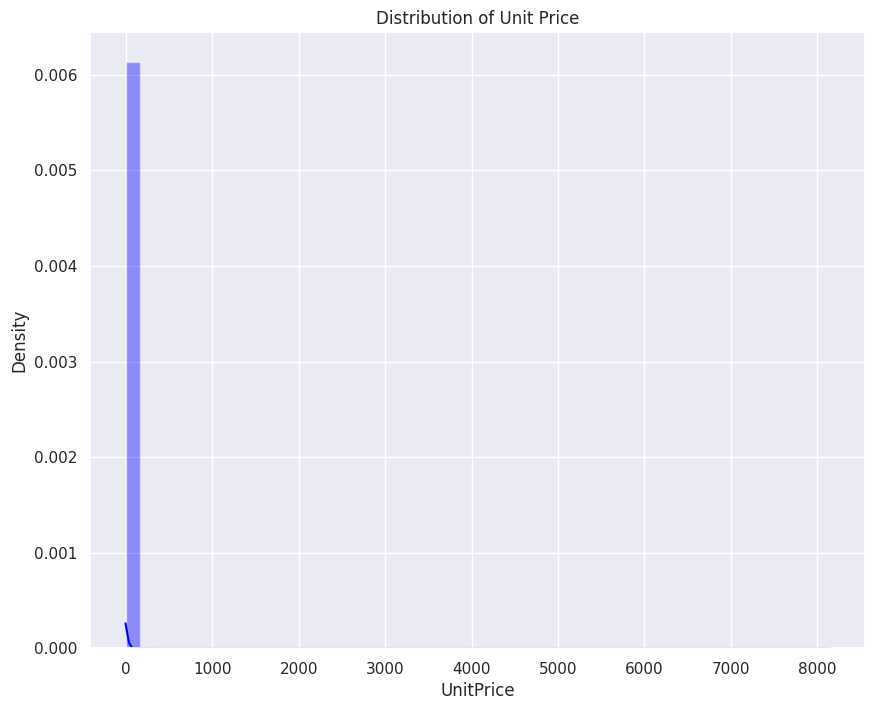

In [52]:
# Chart - 8 visualization code

# Create a figure with a specified size
plt.figure(figsize=(10,8))

# Set the title for the plot
plt.title('Distribution of Unit Price')

# Plot the distribution of the UnitPrice column using the seaborn distplot function
sns.distplot(retail_df_copy['UnitPrice'], color='blue')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: Distplot was chosen as it provides a visual representation of the distribution of UnitPrice values in the dataset. It shows the shape of the distribution and any potential outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : This chart shows the frequency of different UnitPrice values in the dataset. There are also a few outliers at very high values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 : Distribution of total_cost

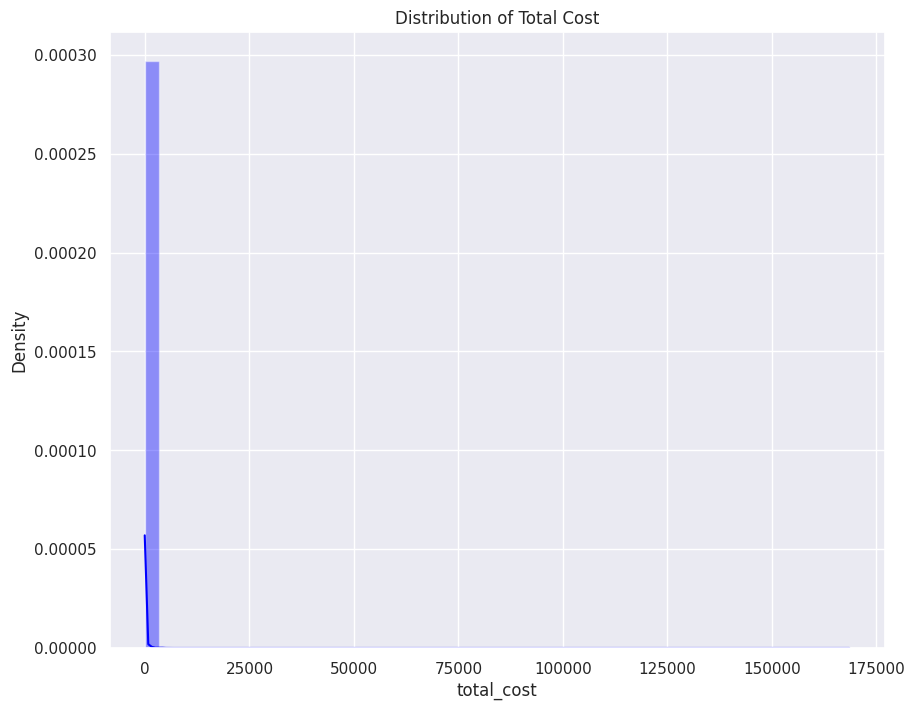

In [53]:
# Chart - 9 visualization code
# Create a figure with a specified size
plt.figure(figsize=(10,8))

# Set the title for the plot
plt.title('Distribution of Total Cost')

# Plot the distribution of the total_cost column using the distplot method from seaborn with color blue
sns.distplot(retail_df_copy['total_cost'], color="blue")

# Show the plot
plt.show()

Distribution of Total Cost after log transformation

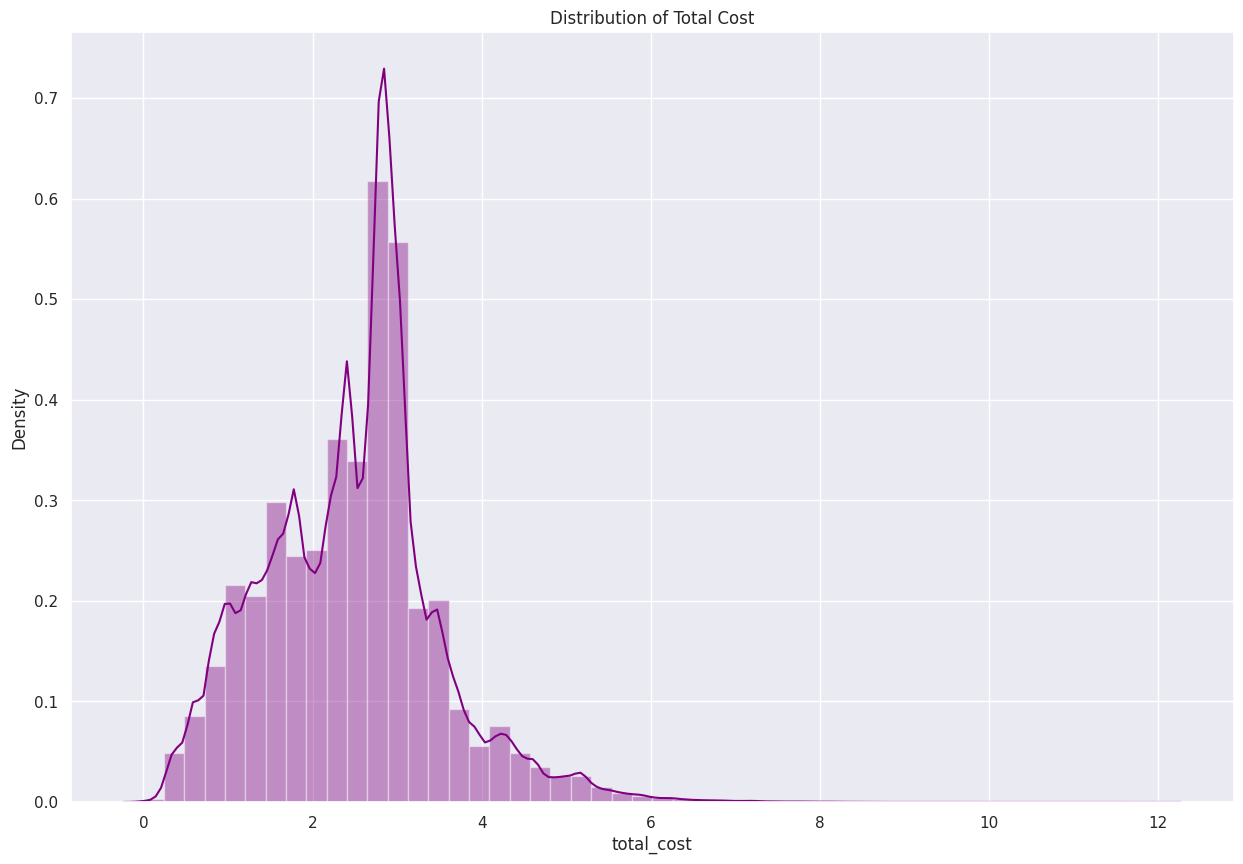

In [54]:
# Create a figure with a specific size
plt.figure(figsize=(15,10))

# Set the title of the plot
plt.title('Distribution of Total Cost')

# Plot the distribution of the log transformed total_cost column using a distplot from the seaborn library
sns.distplot(np.log1p(retail_df_copy['total_cost']), color="purple")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: I picked this specific chart as it provides a good visual representation of the distribution of the total cost of the products in the dataset. It also allows us to see how the data is spread out across different values and gives us an idea of what the average total cost is.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The insight is that cheaper products are more frequent than expensive products, indicating customers prefer low-cost products. After taking the log transformation of total_Cost, we observed that the distribution is now normally distributed. This is because the unit price and quantity of the product are inversely proportional, and both were highly positively skewed before the transformation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: The insights can help create a positive business impact by helping businesses tailor their pricing strategy to better suit customer needs. There are no insights leading to negative growth.

## Remove rows where the value in the 'UnitPrice' column is less than or equal to 0

In [55]:
# Remove rows where the value in the 'UnitPrice' column is less than or equal to 0
retail_df_copy = retail_df_copy[retail_df_copy['UnitPrice'] > 0]
     

In [56]:
# Get descriptive statistics for the total_cost column in the retail_df_copy DataFrame
retail_df_copy['total_cost'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: total_cost, dtype: float64

#### Chart - 10 : Purchasing on different Days

In [57]:
# Create a new DataFrame with the count of each unique day of the week
day_df = retail_df_copy['Day'].value_counts().reset_index()

# Rename the 'index' column to 'Day_Name'
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)

# Rename the 'Day' column to 'Count'
day_df.rename(columns={'Day': 'Count'}, inplace=True)

# Print the resulting DataFrame
day_df

,Day_Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


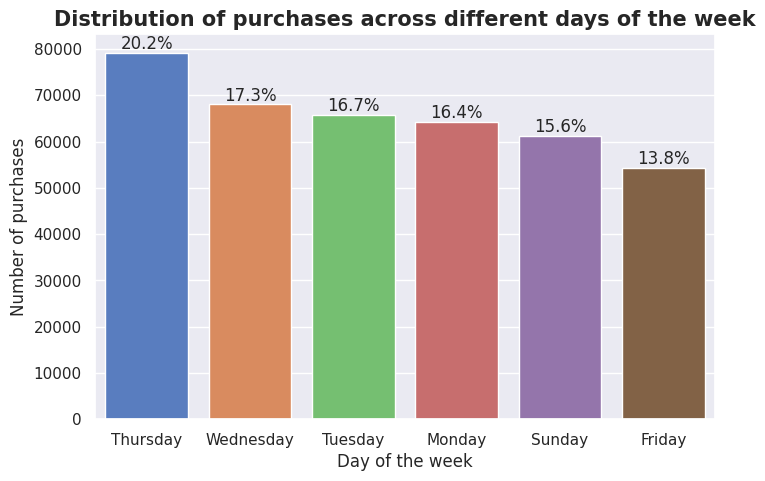

In [58]:
# Chart - 10 visualization code
# Plotting the distribution of purchases across different days of the week
plt.figure(figsize=(8,5))
sns.barplot(x='Day_Name', y='Count', data=day_df, palette="muted")

# Adding percentage value on top of each bar
for i in range(day_df.shape[0]):
    value = day_df['Count'][i]
    percent = '{:.1f}%'.format(value/day_df['Count'].sum() * 100)
    plt.text(i, value, percent, ha='center', va='bottom', size=12)

# Adding title and labels
plt.title('Distribution of purchases across different days of the week', size=15, fontweight='bold')
plt.xlabel('Day of the week', size=12)
plt.ylabel('Number of purchases', size=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: I picked bar chart to show the distribution of purchases across different days of the week.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The insight is that the majority of purchases are made on Thursday and Wednesday, indicating customers prefer shopping during the weekdays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers on specific days. There are no insights leading to negative growth.

#### Chart - 11 : Purchasing on different Months

In [59]:
# Count the number of purchases for each month in the retail_df_copy DataFrame
month_df = retail_df_copy['Month'].value_counts().reset_index()

# Rename the 'index' column to 'Month_Name'
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)

# Rename the 'Month' column to 'Count'
month_df.rename(columns={'Month': 'Count'}, inplace=True)

# Show the resulting DataFrame
month_df

,Month_Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


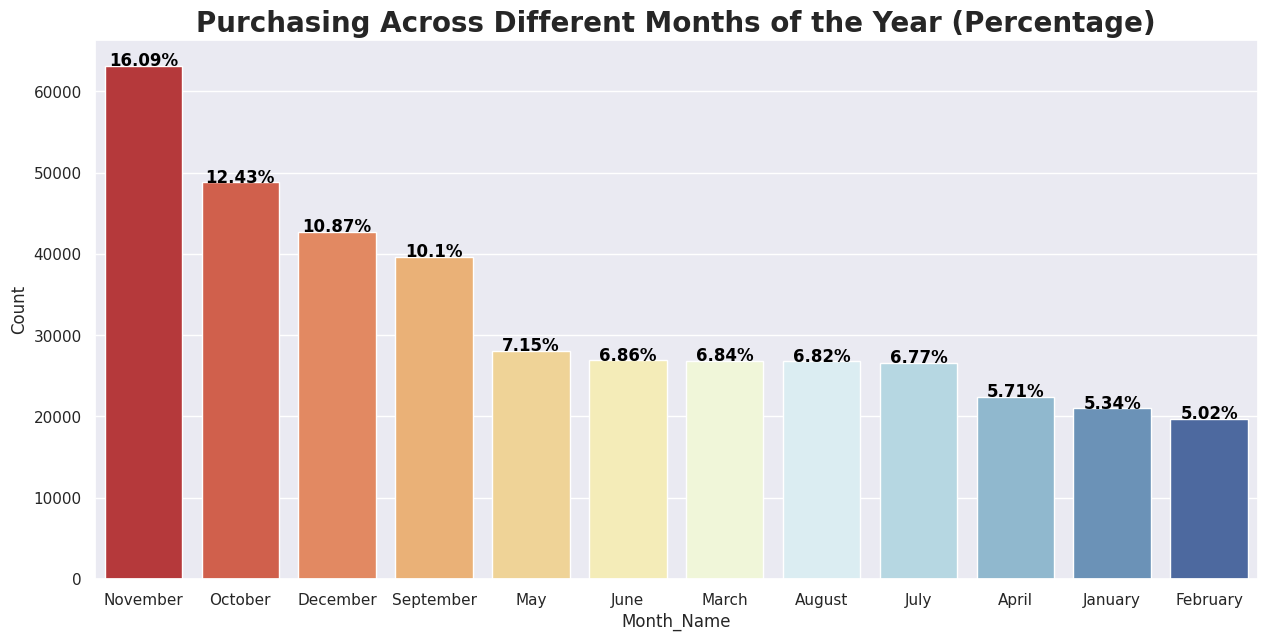

In [60]:
# Chart - 11 visualization code
# Create a figure with a specific size
plt.figure(figsize=(15,7))

# Plot the purchase counts for each month as a bar plot
ax = sns.barplot(x='Month_Name', y='Count', data=month_df, palette='RdYlBu')

# Add the percentage values in the middle of each bar
for i, v in enumerate(month_df['Count']):
    ax.text(i, v, str(round(v / month_df['Count'].sum() * 100, 2)) + '%', color='black', ha='center', fontweight='bold')

# Set the title of the plot
plt.title('Purchasing Across Different Months of the Year (Percentage)', size=20, fontweight='bold')

# Show the plot
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.: I picked bar chart to show the distribution of purchases across different months of the year.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The insight is that the majority of purchases are made in November and October, indicating customers prefer shopping during the fall months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers in specific months.

#### Chart - 12 : Purchasing across different hours of the day

In [61]:

# Count the number of transactions for each hour of the day
hour_df = retail_df_copy['hour'].value_counts().reset_index()

# Rename the 'index' column to 'Hour_Name'
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)

# Rename the 'hour' column to 'Count'
hour_df.rename(columns={'hour': 'Count'}, inplace=True)

# Display the hour_df DataFrame
hour_df

,Hour_Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


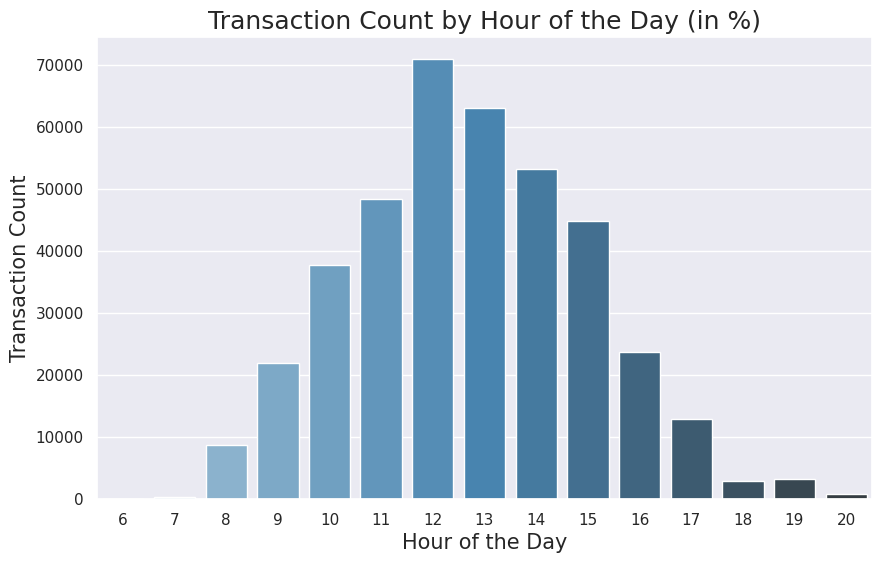

In [62]:
# Chart - 12 visualization code
# Create a barplot of the count of transactions versus the hour of the day
plt.figure(figsize=(10,6))
plt.title('Transaction Count by Hour of the Day (in %)', fontsize=18)
sns.barplot(x='Hour_Name', y='Count', data=hour_df, palette='Blues_d')

# Set x and y labels
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Transaction Count', fontsize=15)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: I picked bar chart to show the distribution of transactions across different hours of the day.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The insight is that the majority of transactions are made between 12PM to 2PM, indicating customers prefer to shop during the afternoon.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers at specific times.

#### Chart - 13

The following code segments the hours of a day into three different time frames - "Morning", "Afternoon", and "Evening" - and adds a new column, named Time_type, to the retail_df_copy dataframe.

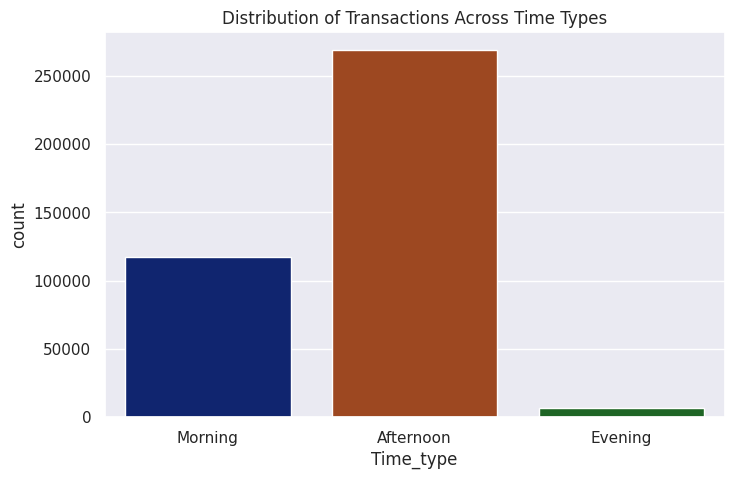

In [63]:
# Chart - 13 visualization code

# Defining a function to categorize the hours into three time types - Morning, Afternoon and Evening
def categorize_hours(hour):
    if hour in [6, 7, 8, 9, 10, 11]:
        return 'Morning'
    elif hour in [12, 13, 14, 15, 16, 17]:
        return 'Afternoon'
    else:
        return 'Evening'

# Adding a new column 'Time_type' to the dataframe by applying the categorize_hours function on the 'hour' column
retail_df_copy['Time_type'] = retail_df_copy['hour'].apply(categorize_hours)

# Plotting a countplot to visualize the distribution of transactions across different time types
plt.figure(figsize=(8, 5))
plt.title('Distribution of Transactions Across Time Types')
sns.countplot(x='Time_type', data=retail_df_copy, palette="dark")

# Showing the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: I picked this chart to show the distribution of transactions across different time types.



##### 2. What is/are the insight(s) found from the chart?

Answer Here : The insight is that the majority of transactions are done during the afternoon, followed by the morning, indicating customers prefer to shop during the afternoon.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers at specific times.

## **RFM Analysis**

RFM analysis is a marketing technique that segments customers based on their recency (time since last purchase), frequency (number of purchases), and monetary value (amount spent) of their transactions. This helps businesses understand their customers better and make data-driven decisions about marketing and customer engagement.

### **Creating Recency Attributes**

In [64]:
# Import the time and warnings modules from the Python Standard Library
import time
import warnings

# Import the datetime module as "dt" for easier use
import datetime as dt
     

In [65]:
# Get the maximum value of the 'InvoiceDate' column
last_date = retail_df_copy['InvoiceDate'].max()

# Output the result
print(last_date)

2011-12-09 12:50:00


In [66]:
# Create a date object representing December 9th, 2011
now = dt.date(2011, 12, 9)

# Print the date object
print(now)

2011-12-09


In [67]:
# Create a new column called 'date' in the 'retail_df_copy' DataFrame
retail_df_copy['date'] = retail_df_copy['InvoiceDate'].dt.date

# Extract the date component of the 'InvoiceDate' column in the DataFrame
# The '.dt' accessor is used to access the datetime attributes of the 'InvoiceDate' column
# The '.date' attribute returns the date component of the datetime value
     

In [68]:
# Display the first 5 rows of the DataFrame
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,Day,Month,year,month_num,day_num,hour,minute,Time_type,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01


In [69]:
# Group the data by customer ID and find the most recent purchase date for each customer
recency_df = retail_df_copy.groupby(by='CustomerID', as_index=False)['date'].max()

# Rename the columns in the resulting dataframe to reflect the customer ID and most recent purchase date
recency_df.columns = ['CustomerID','LastPurchaseDate']

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [70]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [71]:

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [72]:

# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)
     

### **Creating Frequency Attributes**

In [73]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = retail_df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()

# Rename the columns in the resulting dataframe to reflect the customer ID and purchase frequency
frequency_df.columns = ['CustomerID','Frequency']

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head()
     

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### **Creating Monetary Attributes**

In [74]:

# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = retail_df_copy.groupby(by='CustomerID', as_index=False)['total_cost'].sum()

# Rename the columns in the resulting dataframe to reflect the customer ID and total amount spent
monetary_df.columns = ['CustomerID','MonetaryValue']

# Display the first few rows of the dataframe to inspect the results
monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


The RFM dataframe combines recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.

In [75]:
# Merge the recency and frequency dataframes on the customer ID column
temp_df = recency_df.merge(frequency_df, on='CustomerID')

# Merge the monetary value dataframe on the customer ID column
rfm_df = temp_df.merge(monetary_df, on='CustomerID')

# Display the first few rows of the resulting dataframe to inspect the results
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [76]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q=[0.25,0.5,0.75])

# Print the quantile values for inspection
print(quantiles)

      Recency  Frequency  MonetaryValue
0.25    17.00       17.0       306.4825
0.50    50.00       41.0       668.5700
0.75   141.75       98.0      1660.5975


In [77]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

# Print the dictionary for inspection
print(quantiles_dict)

{0.25: {'Recency': 17.0, 'Frequency': 17.0, 'MonetaryValue': 306.48249999999996}, 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 668.57}, 0.75: {'Recency': 141.75, 'Frequency': 98.0, 'MonetaryValue': 1660.5974999999999}}


### **Creating RFM table and calculating RFM Score**

In [78]:
# Assigning quantile labels to Recency, Frequency and MonetaryValue
quantile_labels = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']

# Creating RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(4, 0, -1)))

# Creating FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Creating MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [79]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [80]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)
     

In [81]:

# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending=False)

In [82]:
rfm_df2.head()


,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1689,14646.0,1,2076,280206.02,4,4,4,444
4201,18102.0,0,431,259657.30,4,4,4,444
3728,17450.0,8,336,194390.79,4,4,4,444
1879,14911.0,1,5670,143711.17,4,4,4,444
1333,14156.0,9,1395,117210.08,4,4,4,444


In [83]:
# Categorising customer or making customer segmentation based on RFM Score
print("Best Customers: ",len(rfm_df[rfm_df['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore']==4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore']==4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore']=='111']))

Best Customers:  443
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  105
Lost Customers:  22
Lost Cheap Customers:  381


### **With the segmentation of our customers based on their RFM scores, we can now tailor our marketing strategies to each segment effectively.**

For example, our "Best Customers" or "Champions" can be rewarded for their loyalty. These customers can also serve as early adopters for new products, so we can suggest them to participate in a "Refer a Friend" program.

For customers who are "At Risk", we can send them personalized emails to encourage them to make a purchase. This can help to retain them as customers and keep them engaged with our brand.

In [84]:
# Dropping the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['FrequencyScore','RecencyScore','MonetaryScore','RFMScore'], axis=1)

# Setting the customer id as index of the dataframe
rfm_data.set_index("CustomerID", inplace=True)

# Printing the first 5 rows of the updated dataframe
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


#### Chart - 14 - Correlation Heatmap

## Feature Correlations

In [85]:
# Calculate the correlation between the variables
correlation = rfm_data.corr()

# Display the correlation matrix
correlation

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206501,-0.121975
Frequency,-0.206501,1.000000,0.425282
MonetaryValue,-0.121975,0.425282,1.000000


<Axes: >

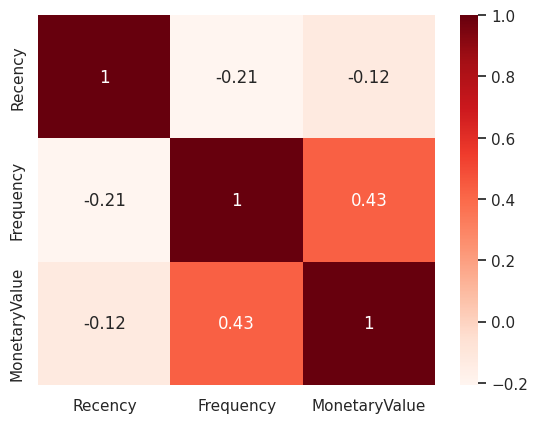

In [86]:
# Correlation Heatmap visualization code
# Plotting the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot=True, cmap='Reds')
     

##### 1. Why did you pick the specific chart?

Answer Here.:-I picked this chart to show the correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

#### Chart - 15 - Pair Plot 

###Plot the distribution of Recency, Frequency, and MonetaryValue.

A scatter matrix is a visual representation of the relationships between multiple variables or features in a dataset. It can help identify patterns, trends, and correlations between the variables. It is a useful tool for exploratory data analysis and can help provide insight into the data.

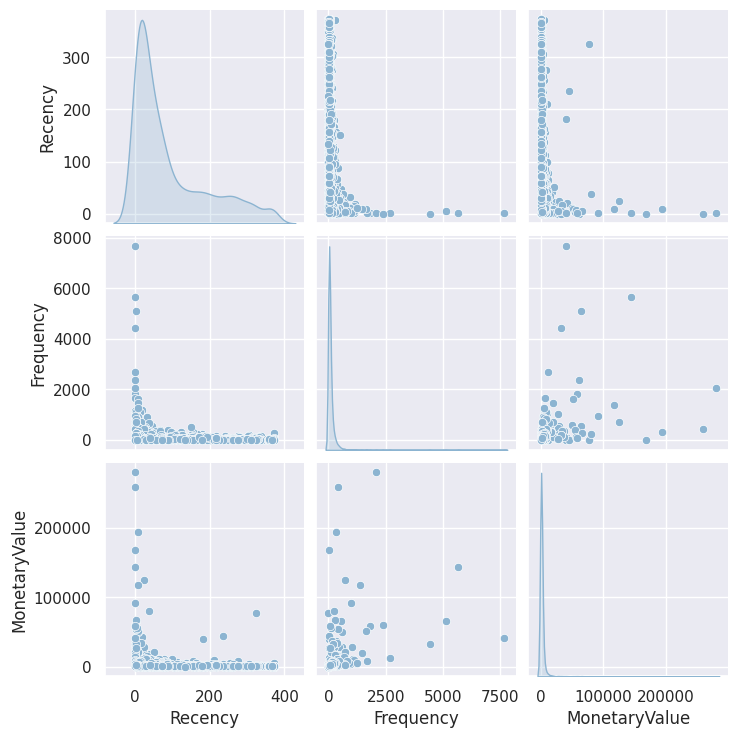

In [87]:
# Pair Plot visualization code
#Visualizing the distribution of features in the dataset using Seaborn.
sns.pairplot(rfm_data, diag_kind='kde')

##### 1. Why did you pick the specific chart?

Answer Here.: The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here : We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

In [88]:
#The skew() method is used to measure the asymmetry of the data around the mean. 
rfm_data.skew()

Recency           1.245826
Frequency        18.043530
MonetaryValue    19.339368
dtype: float64

## **Data Normalization**

"For data normalization, logarithmic transformations were applied to the Recency and Monetary features, while a natural logarithmic transformation was applied to the Frequency feature. This was done to reduce the impact of outliers and to scale the data. A small constant value (0.1) was added to the original values before taking the logarithm to avoid taking the logarithm of zero or negative values."

In [89]:
# Calculate the logarithmic values of the Recency and Monetary features
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)  # logarithmic value of the Recency feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)  # logarithmic value of the Monetary feature
rfm_f_log = np.log(rfm_data['Frequency'])  # calculate the natural log of the 'Frequency' column

In [90]:
# Create a dictionary with the logarithmic values of the Monetary, Recency, and Frequency features
data = {
    'Monetary': rfm_m_log,  # logarithmic value of the Monetary feature
    'Recency': rfm_r_log,   # logarithmic value of the Recency feature
    'Frequency': rfm_f_log  # logarithmic value of the Frequency feature
}

# Create a pandas DataFrame from the dictionary
log_data = pd.DataFrame(data)
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


### **Plot the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**

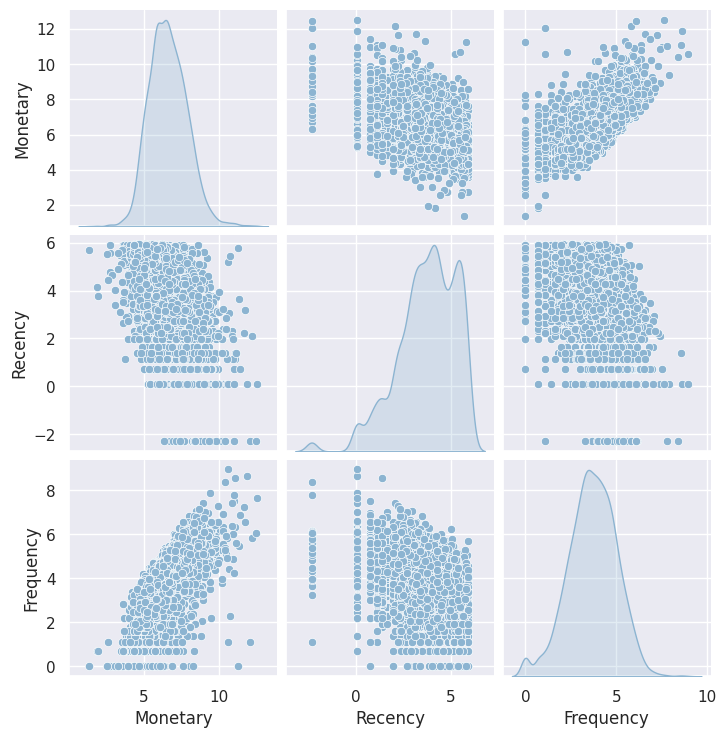

In [91]:

# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data
sns.pairplot(data=log_data, diag_kind='kde') 

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [92]:
# Calculate the skewness of each feature in the data
log_data.skew() 

Monetary     0.385332
Recency     -0.869633
Frequency   -0.217968
dtype: float64

### Correlation Heatmap

<Axes: >

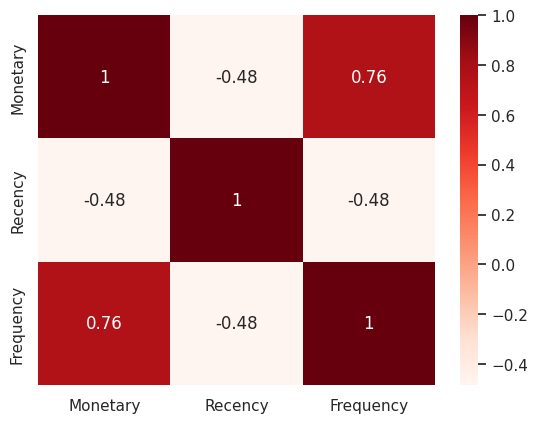

In [93]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(),annot=True, cmap='Reds')

The correlation between Monetary and Frequency is now stronger.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 : Do recent customers tend to spend more?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.: 

*   Null hypothesis: Recent customers do not tend to spend more than older customers.
*   Alternative hypothesis: Recent customers tend to spend more than older customers.



#### 2. Perform an appropriate statistical test.

In [94]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# create two groups: recent (made a purchase within the last 30 days) and older (made a purchase more than 30 days ago)
recent = rfm_data[rfm_data['Recency'] <= 30]
older = rfm_data[rfm_data['Recency'] > 30]

# calculate mean monetary value for each group
mean_recent = np.mean(recent['MonetaryValue'])
mean_older = np.mean(older['MonetaryValue'])

# state the null hypothesis and alternative hypothesis
null_hypothesis = "Recent customers do not tend to have a higher monetary value than older customers"
alternative_hypothesis = "Recent customers tend to have a higher monetary value than older customers"

# perform two-sample t-test
t, p = ttest_ind(recent['MonetaryValue'], older['MonetaryValue'], equal_var=True)

# determine whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. " + alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis. " + null_hypothesis)

# output the mean monetary value for each group, as well as the t-statistic and p-value
print("Mean monetary value of recent customers: ", mean_recent)
print("Mean monetary value of non-recent customers: ", mean_older)
print("T-statistic: ", t)
print("P-value: ", p)
print("Degrees of freedom: ", len(recent) + len(older) - 2)

Reject the null hypothesis. Recent customers tend to have a higher monetary value than older customers
Mean monetary value of recent customers:  3773.6855668866224
Mean monetary value of non-recent customers:  972.0984852115314
T-statistic:  10.105070005362506
P-value:  9.591951904780364e-24
Degrees of freedom:  4336


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2 : Do frequent customer spend large or small amount at a time?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.: 

*   Null hypothesis: Frequent customers do not spend more than non-frequent customers.


*   Alternative hypothesis: Frequent customers spend more than non-frequent customers.



#### 2. Perform an appropriate statistical test.

In [110]:
# Perform Statistical Test to obtain P-Value
# create two groups: frequent (made more than 10 purchases) and non-frequent (made 10 or fewer purchases)
frequent = rfm_data[rfm_data['Frequency'] > 10]
non_frequent = rfm_data[rfm_data['Frequency'] <= 10]

# calculate mean monetary value for each group
mean_frequent = np.mean(frequent['MonetaryValue'])
mean_non_frequent = np.mean(non_frequent['MonetaryValue'])

# state the null hypothesis and alternative hypothesis
null_hypothesis = "Frequent customers do not spend more than non-frequent customers"
alternative_hypothesis = "Frequent customers spend more than non-frequent customers"

# perform two-sample t-test
t, p = ttest_ind(frequent['MonetaryValue'], non_frequent['MonetaryValue'], equal_var=True)

# determine whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. " + alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis. " + null_hypothesis)

# output the mean monetary value for each group, as well as the t-statistic and p-value
print("Mean monetary value of frequent customers: ", mean_frequent)
print("Mean monetary value of non-frequent customers: ", mean_non_frequent)
print("Standard deviation of monetary value for frequent customers: ", np.std(frequent['MonetaryValue']))
print("Standard deviation of monetary value for non-frequent customers: ", np.std(non_frequent['MonetaryValue']))
print("T-statistic: ", t)
print("P-value: ", p)
print("Degrees of freedom: ", len(frequent) + len(non_frequent) - 2)

Reject the null hypothesis. Frequent customers spend more than non-frequent customers
Mean monetary value of frequent customers:  2264.3278069603048
Mean monetary value of non-frequent customers:  846.9866969696969
Standard deviation of monetary value for frequent customers:  9197.118518568444
Standard deviation of monetary value for non-frequent customers:  7578.863855033147
T-statistic:  3.737028591933941
P-value:  0.0001886051356908592
Degrees of freedom:  4336


Reject the null hypothesis. Frequent customers spend more than non-frequent customers

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## **Data Scaling**

In [95]:
# Assign the normalized data to a variable "X"
X = log_data

In [96]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)
     

I used Standardization to transform my features in order to ensure that they had a similar scale and distribution. This was important because some machine learning algorithms are sensitive to the scale and distribution of features, and Standardization helps to ensure unbiased results.

In [97]:

# Importing Libraries
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler

## ***7. ML Model Implementation***

### ML Model - 1 : K-means Implementation

K-means is a clustering algorithm that groups data points into K clusters. Choosing the right number of clusters can be challenging. The Silhouette Coefficient can be used to evaluate the quality of the clusters by measuring the similarity of each data point to its assigned cluster. A high Silhouette Score indicates a good quality cluster. To ensure a high-quality solution, k-means++ should be used for initialization.

## 1.1 K-Means with silhouette_score

Silhouette score for 2 clusters: 0.396
Silhouette score for 3 clusters: 0.308
Silhouette score for 4 clusters: 0.297
Silhouette score for 5 clusters: 0.277
Silhouette score for 6 clusters: 0.277
Silhouette score for 7 clusters: 0.268
Silhouette score for 8 clusters: 0.263
Silhouette score for 9 clusters: 0.251
Silhouette score for 10 clusters: 0.257
Silhouette score for 11 clusters: 0.249
Silhouette score for 12 clusters: 0.266
Silhouette score for 13 clusters: 0.260
Silhouette score for 14 clusters: 0.263
Silhouette score for 15 clusters: 0.260


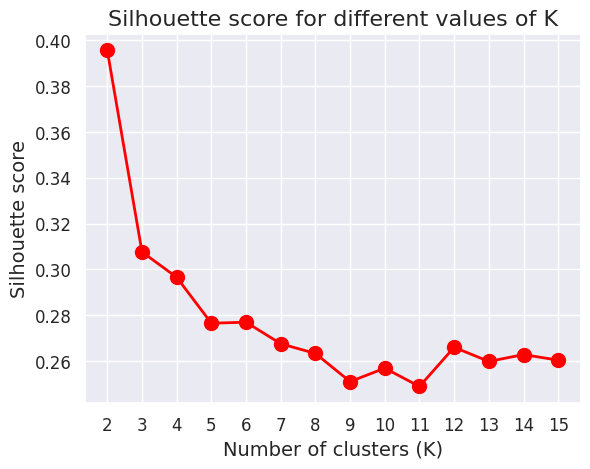

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Your data
X = X

silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
    # Initialize the KMeans model with the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    
    # Fit the KMeans model to the data
    kmeans.fit(X)
    
    # Predict the cluster labels for each data point
    labels = kmeans.labels_
    
    # Calculate the silhouette score for this solution
    silhouette = silhouette_score(X, labels)
    
    # Append the silhouette score to the array
    silhouette_scores.append(silhouette)
    
    # Print the silhouette score for this solution
    print(f"Silhouette score for {n_clusters} clusters: {silhouette:.3f}")
    
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

1) The silhouette score plot is commonly used to evaluate the quality of clustering.

2) The plot suggests that 2 clusters are optimal for the dataset.


In [99]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the input data X to the KMeans model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

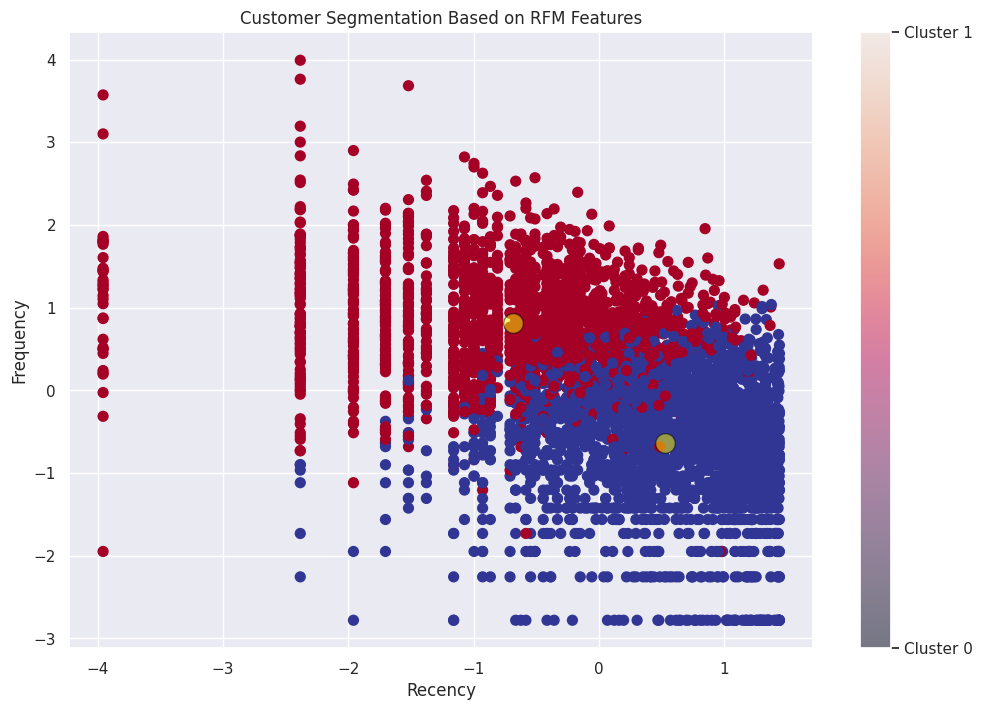

In [100]:
# Visualization of customer segmentation based On RFM features. 
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

1) The scatter plot is commonly used to visualize the distribution of data points in a 2D space. In this case, the scatter plot is used to visualize customer segmentation based on RFM (Recency, Frequency, Monetary) features.

2) The scatter plot reveals distinct clusters of customers based on their RFM features. This allows businesses to identify groups of customers with similar behavior and tailor their marketing strategies accordingly. The cluster centers (yellow circles) also provide a visual representation of the typical RFM profile of each customer segment.

3) By enabling businesses to identify and target specific customer segments with personalized marketing strategies and product recommendations. This can lead to improved customer experiences, increased customer loyalty, and ultimately, positive business impact.

## 1.2 K-Means with Elbow method

The elbow method is used to find the optimal number of clusters for KMeans clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The elbow point on the plot corresponds to the optimal number of clusters that balances the trade-off between model complexity and data structure.

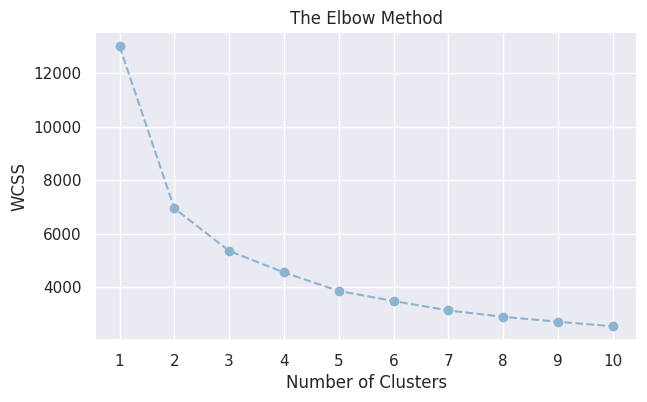

In [101]:

# Input data X

wcss = []  # Initialize an empty list to store the WCSS values for different number of clusters

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(7,4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.

In [102]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,1,77183.60,1,1,4,114,0
1,12347.0,2,182,4310.00,4,4,4,444,1
2,12348.0,75,31,1797.24,2,2,4,224,0
3,12349.0,18,73,1757.55,3,3,4,334,1
4,12350.0,310,17,334.40,1,1,2,112,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 : Agglomerative Hierarchial Clustering

Agglomerative Hierarchical Clustering is a clustering algorithm that starts with each data point in its own cluster, and then merges the two closest clusters until only one remains, producing a tree-like structure. Different distance metrics and linkage criteria can be used to determine proximity between clusters. It is a popular and effective method for exploratory data analysis.

In [103]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)

AgglomerativeClustering(affinity='euclidean')

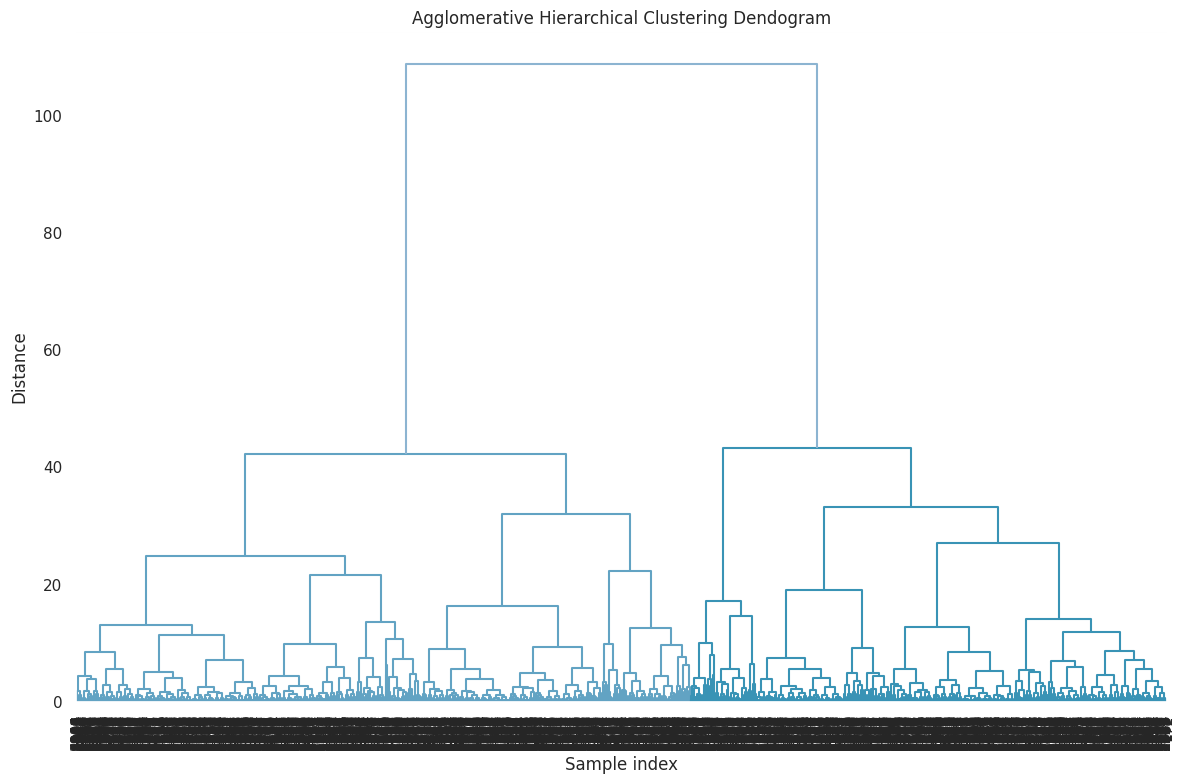

In [104]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(12, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

1) I picked a dendrogram plot because it is a common way to visualize the results of hierarchical clustering, which is the clustering method used in this case.

2) The dendrogram plot shows how the data points are clustered based on their distance to each other. It helps identify the optimal number of clusters and the hierarchical structure of the clusters.

3) The insights gained from the dendrogram plot can help identify the optimal number of clusters and determine which observations or clusters are most similar to each other. This information can be used to create more targeted marketing or sales strategies and improve overall business performance.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 : DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a clustering algorithm that groups together data points that are close to each other and are part of a dense region of the dataset. It is useful for handling non-linearly separable data and can handle noise and outliers.

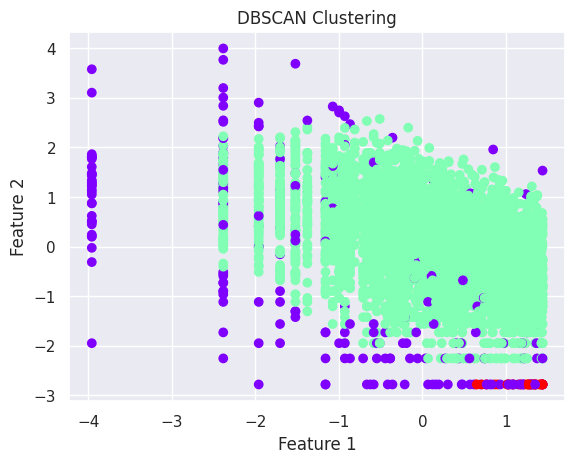

In [107]:

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

1) The chart used is a scatter plot, which is a suitable choice for visualizing the clustering results of DBSCAN. The x and y axes represent the two features of the dataset, and the points are colored based on their assigned cluster labels.

2) The insights gained from the chart include identifying the clusters formed by the DBSCAN algorithm and their density. The points that are closer to each other are assigned to the same cluster, and the outliers or noise points are labeled as -1. By observing the distribution of the points and the density of the clusters, we can understand the structure and characteristics of the data, and potentially find any patterns or anomalies.

3) The gained insights can help in creating a positive business impact by identifying groups of similar data points, which can aid in targeting specific segments of customers or optimizing operational processes.

# **Summary Table**

In [108]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             3             |
+--------+-------------------------------+------+---------------------------+


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [109]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## 1. EDA
*   Null values and duplicates were removed from the dataset before applying clustering.
*   Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.
*   The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).
*   The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.
*   The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.
*   New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.
*   The total amount of each order was calculated using the product of unit price and quantity.
*   The months of November, October, December, September, and May generated the most business.
*   The most popular purchasing days were Thursday, Wednesday, Tuesday, Monday, Saturday, and Friday.
*   Most customers made purchases between 10:00 A.M. and 2:00 P.M.
*   The top time duration for purchasing was found to be afternoon, followed by morning and evening.

##2. Algorithm

RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.

Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.



*   K-Means with Silhouette_score

*   K-Means with Elbow Method

*   Hierarchical Clustering
*   DBSCAN




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***